# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Загрузка и предварительнный анализ данных

In [2]:
df=pd.read_csv("Churn_Modeling.csv")
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1.0,Yes,101348.88,Yes
1,Hill,608,Spain,Female,41,1,83807.86,1.0,Yes,112542.58,No
2,Onio,502,France,Female,42,8,159660.80,3.0,No,113931.57,Yes
3,Boni,699,France,Female,39,1,0.00,2.0,No,93826.63,No
4,Mitchell,850,Spain,Female,43,2,125510.82,1.0,Yes,79084.10,No
...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2.0,No,96270.64,No
9996,Johnstone,516,France,Male,35,10,57369.61,NaN,Yes,101699.77,No
9997,Liu,709,France,Female,36,7,0.00,1.0,Yes,42085.58,Yes
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2.0,No,92888.52,Yes


Датасет состоит из 10000 строк и 11 столбцов, представляющих информацию о клиентах банка. Присутствуют такие атрибуты, как фамилия клиента, его кредитный рейтинг, страна, пол, возраст, срок пользования продуктами банка, баланс счета, число банковских продуктов,  информация об активности клиента, оценочной зарплате и вероятности оттока клиента.
В дальнейшем при построении модеди машинного обучения будет решаться задача классификации. По характеристикам клиента нужно будет установить значение зависимой переменной- вероятный отток клиента (да/нет).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    9922 non-null   float64
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  9989 non-null   float64
 10  Exited           10000 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 859.5+ KB


In [4]:
df.isna().sum()

Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts      78
IsActiveMember      0
EstimatedSalary    11
Exited              0
dtype: int64

В датасете 3 столбца имеют формат значений число с плавающей точкой, 3 - целочисленный, 5 - текстовый. Отсутствует информация о числе продуктов для 78 клиентов, для 11 пропущена оценочная зарплата. Следовательно, нужно будет заполнить пропуски в ходе дальнейшей обработки значений.

In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,9922.000000,9989.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530639,100071.518871
std,96.653299,10.487806,2.892174,62397.405202,0.581888,57512.067936
min,350.000000,18.000000,0.000000,0.000000,1.000000,90.070000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,50974.570000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100183.050000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149384.430000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


Для атрибутов с числовыми значениями приведены статистические характеристики. Так, значение кредитного рейтинга находится в интервале от 350 до 850, среднее значение-650,5, разброс 96,7 баллов. Клиентами банка являются люди в возрасте от 18 до 92 лет, средний возраст-39 лет. Они пользуются банковскими продуктами от 0 до 10 лет, в среднем-5 с отклонением 2,9 года. Распределение величин похоже на нормальное. Как минимум 25% счетов клиентов-пустые, в среднем баланс составляет 76 тыс., максимальный- 251 тыс. Более половины клиентов владеют одним банковским продуктом, максимальное число-4. Оценочная зарплата при среднем значении 100 тыс. распределена со значительным разбросом- от 90 у.е. до 200 тыс. 

In [6]:
df.describe(include =['object'])

,Surname,Geography,Gender,IsActiveMember,Exited
count,10000,10000,10000,10000,10000
unique,2932,3,2,2,2
top,Smith,France,Male,Yes,No
freq,32,5014,5457,5151,7963


Для строковых данных характерны следующие характеристики. Самая частая фамилия клиента-Смит, в основном это мужчины (54%) из Франции (50%), всего клиенты из 3 стран. Активно пользуются продуктами банка 5151 чел., не уйдут из него, как ожидается, 7963 чел. Фамилия-не категориальное поле, потому оно не внесет вклад в построение модели МО и может быть удалено.

# Визуализация и анализ распределения данных

Отобразим графики основных переменных датасета, также проилюстрировав изменение значений в разрезе целевой переменной.

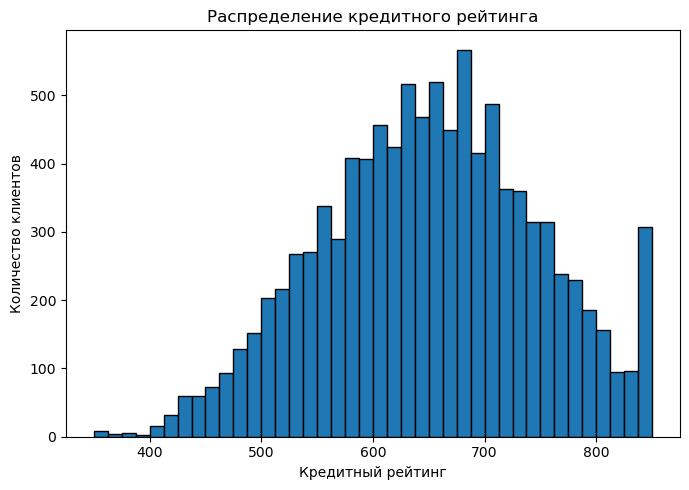

In [7]:
plt.figure(figsize=[7,5])
plt.hist(df.CreditScore,bins=40, edgecolor = 'black')
plt.xlabel("Кредитный рейтинг")
plt.ylabel("Количество клиентов")
plt.title("Распределение кредитного рейтинга")
plt.tight_layout()
plt.show()

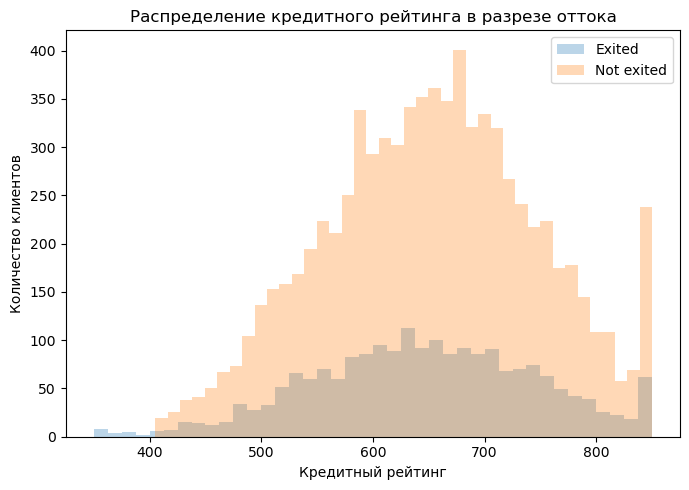

In [8]:
plt.figure(figsize=[7,5])
plt.hist(df[df["Exited"]=="Yes"]["CreditScore"],bins=40,alpha=0.3, label="Exited")
plt.hist(df[df["Exited"]=="No"]["CreditScore"],bins=40,alpha=0.3,label="Not exited")
plt.xlabel("Кредитный рейтинг")
plt.ylabel("Количество клиентов")
plt.title("Распределение кредитного рейтинга в разрезе оттока")
plt.legend()
plt.tight_layout()
plt.show()

Так, распределение кредитного рейтинга близко к нормальному, существуют выбросы в середине ряда (между 600 и 700) и на уровне максимума около 850. Для клиентов в оттоке и вне него закономерности схожи, потому существенное влияние рейтинга на отток не выявлено.

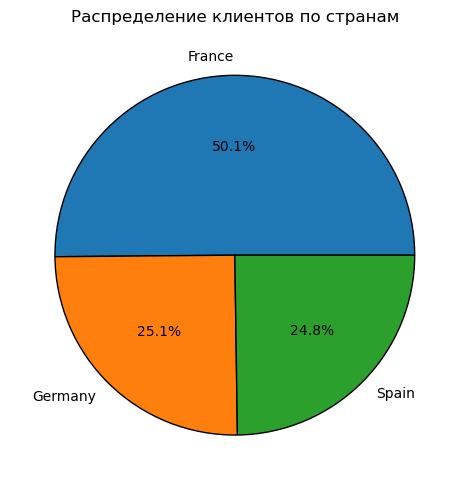

In [9]:
plt.figure(figsize=[7,5])
Countries = dict(df["Geography"].value_counts())
plt.pie(Countries.values(),labels=Countries.keys(),wedgeprops={"edgecolor":"black"},autopct="%1.1f%%")
plt.title("Распределение клиентов по странам")
plt.tight_layout()
plt.show()

In [10]:
pd.pivot_table(df,
               index=['Geography','Exited'],
              values=['Surname'],
              aggfunc=[len])

len
                 Surname
Geography Exited        
France    No        4204
          Yes        810
Germany   No        1695
          Yes        814
Spain     No        2064
          Yes        413

Согласно графику, половина клиентов из Франции, по 1/4-из Германии и Испании. При этом, согласно сводной таблице, клиенты из Германии покидают банк вдвое чаще, в пересчете на доли.

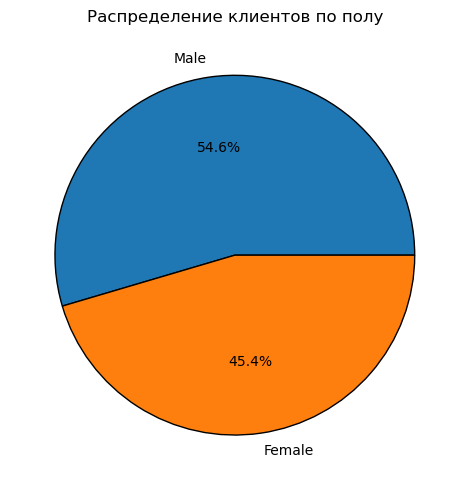

In [11]:
plt.figure(figsize=[7,5])
gender = dict(df["Gender"].value_counts())
plt.pie(gender.values(),labels=gender.keys(),wedgeprops={"edgecolor":"black"},autopct="%1.1f%%")
plt.title("Распределение клиентов по полу")
plt.tight_layout()
plt.show()

In [12]:
pd.pivot_table(df,
               index=['Gender','Exited'],
              values=['Surname'],
              aggfunc=[len])

len
              Surname
Gender Exited        
Female No        3404
       Yes       1139
Male   No        4559
       Yes        898

Среди клиентов банка преобладают мужчины, однако оттоку, согласно сводной таблице, больше подвержены женщины-25% в сравнении с 16% для мужчин.

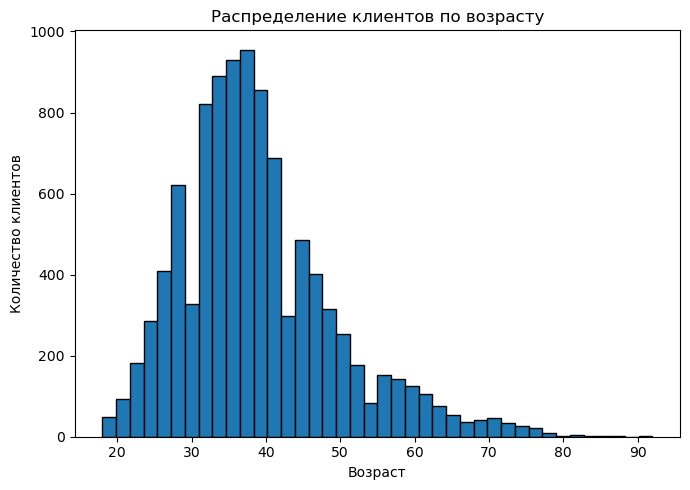

In [13]:
plt.figure(figsize=[7,5])
plt.hist(df.Age,bins=40,edgecolor = 'black')
plt.xlabel("Возраст")
plt.ylabel("Количество клиентов")
plt.title("Распределение клиентов по возрасту")
plt.tight_layout()
plt.show()

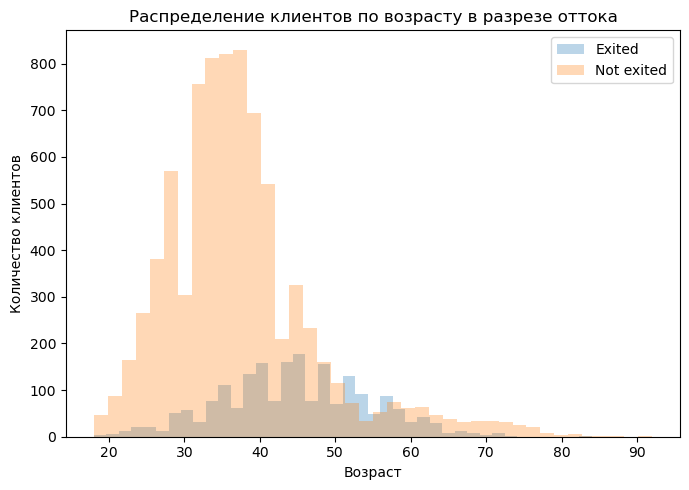

In [14]:
plt.figure(figsize=[7,5])
plt.hist(df[df["Exited"]=="Yes"]["Age"],bins=40,alpha=0.3, label="Exited")
plt.hist(df[df["Exited"]=="No"]["Age"],bins=40,alpha=0.3,label="Not exited")
plt.xlabel("Возраст")
plt.ylabel("Количество клиентов")
plt.title("Распределение клиентов по возрасту в разрезе оттока")
plt.legend()
plt.tight_layout()
plt.show()

В целом распределение клиентов биноминальное, преобладают люди в возрасте от 30 до 40 лет, эта тенденция сохраняется и для активных клиентов. Подверженные оттоку клиенты, как правило, в возрасте от 40 до 50 лет. Потому прослеживается некоторая зависимость целевой переменной от возраста.

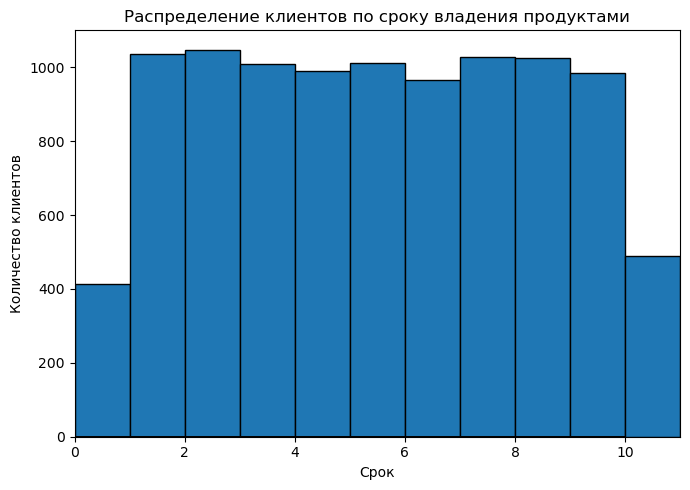

In [15]:
plt.figure(figsize=[7,5])
plt.hist(df.Tenure,bins=len(df.Tenure),width=1,edgecolor = 'black')
plt.xlim(0,11)
plt.xlabel("Срок")
plt.ylabel("Количество клиентов")
plt.title("Распределение клиентов по сроку владения продуктами")
plt.tight_layout()
plt.show()

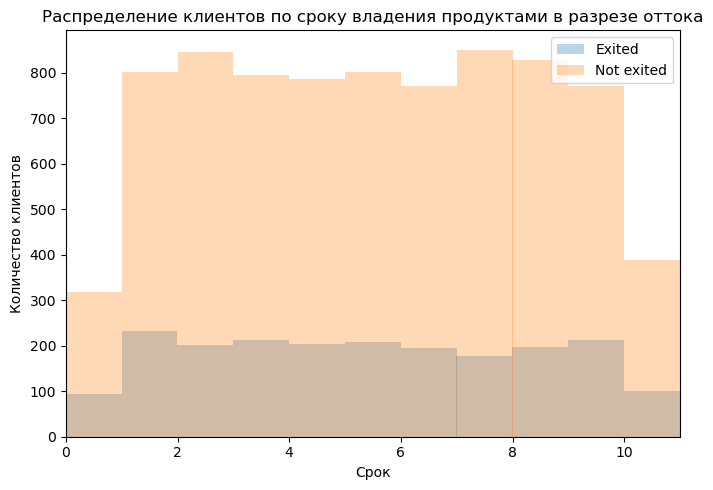

In [16]:
plt.figure(figsize=[7,5])
plt.hist(df[df["Exited"]=="Yes"]["Tenure"],bins=len(df[df["Exited"]=="Yes"]["Tenure"]),width=1,alpha=0.3, label="Exited")
plt.hist(df[df["Exited"]=="No"]["Tenure"],bins=len(df[df["Exited"]=="No"]["Tenure"]),width=1,alpha=0.3,label="Not exited")
plt.xlim(0,11)
plt.xlabel("Срок")
plt.ylabel("Количество клиентов")
plt.title("Распределение клиентов по сроку владения продуктами в разрезе оттока")
plt.legend()
plt.tight_layout()
plt.show()

Для распределения по сроку тенденция следующая: 5%-до года, по 10% с 1 до 9 лет, 5%-свыше 9 лет. Тенденция сохраняется и при анализе оттока, следовательно, срок владения продуктом не оказывает на него существенного влияния.

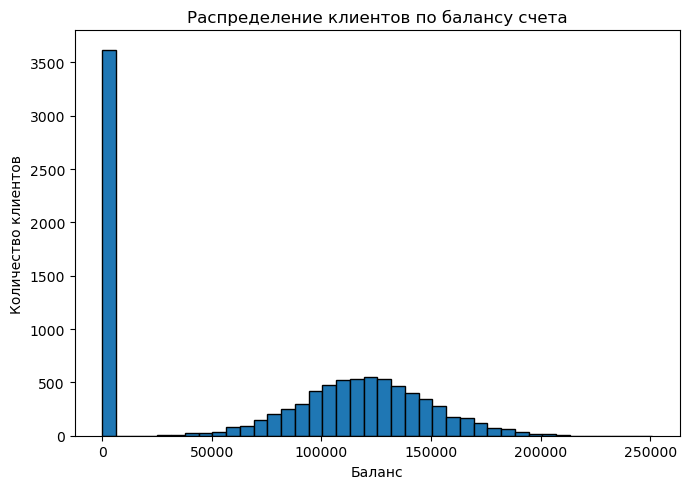

In [17]:
plt.figure(figsize=[7,5])
plt.hist(df.Balance,bins=40,edgecolor = 'black')
plt.xlabel("Баланс")
plt.ylabel("Количество клиентов")
plt.title("Распределение клиентов по балансу счета")
plt.tight_layout()
plt.show()

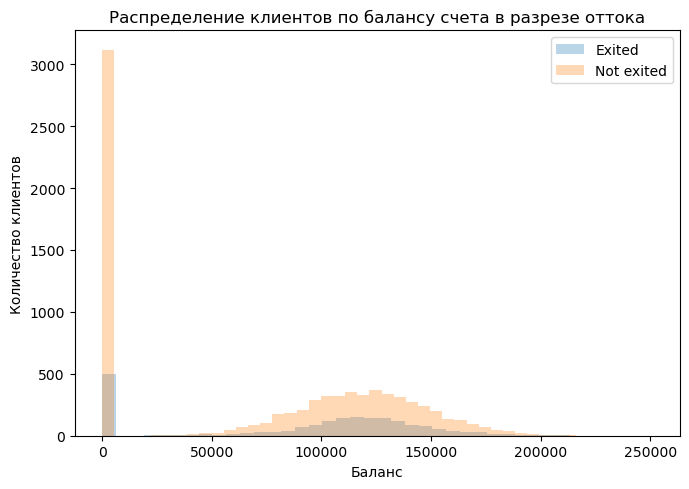

In [18]:
plt.figure(figsize=[7,5])
plt.hist(df[df["Exited"]=="Yes"]["Balance"],bins=40,alpha=0.3, label="Exited")
plt.hist(df[df["Exited"]=="No"]["Balance"],bins=40,alpha=0.3,label="Not exited")
plt.xlabel("Баланс")
plt.ylabel("Количество клиентов")
plt.title("Распределение клиентов по балансу счета в разрезе оттока")
plt.legend()
plt.tight_layout()
plt.show()

Около трети клиентов имеют пустые счета, что выглядит как выброс, для остальных баланс распределен по нормальному закону в диапазоне от 50 до 200 тыс. При этом доля пустых счетов в перерасчете на отток приходится больше на активных клиентов. Следовательно, пустой счет-не главная предпосылка оттока.

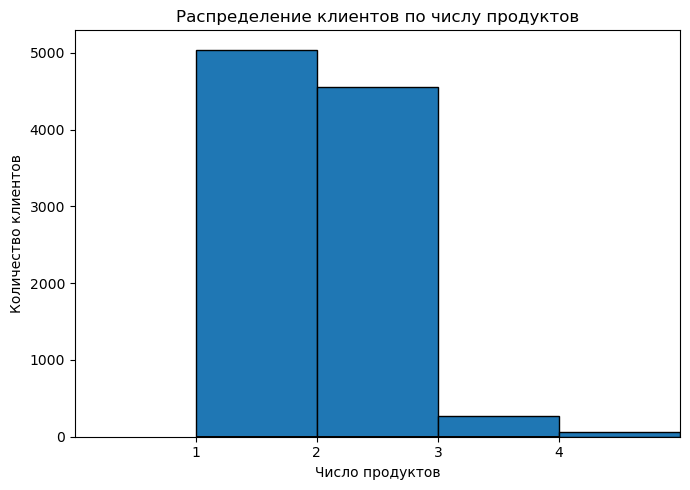

In [19]:
plt.figure(figsize=[7,5])
plt.hist(df.NumOfProducts,bins=len(df.NumOfProducts),width=1,edgecolor = 'black')
plt.xlim(0,5)
plt.xticks([1,2,3,4])
plt.xlabel("Число продуктов")
plt.ylabel("Количество клиентов")
plt.title("Распределение клиентов по числу продуктов")
plt.tight_layout()
plt.show()

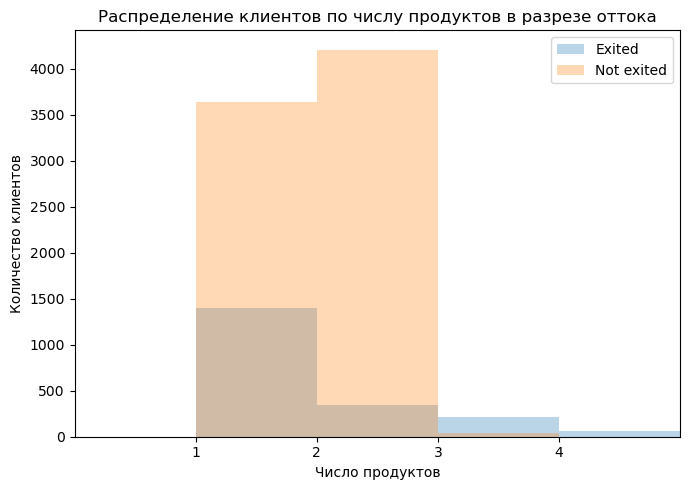

In [20]:
plt.figure(figsize=[7,5])
plt.hist(df[df["Exited"]=="Yes"]["NumOfProducts"],bins=len(df[df["Exited"]=="Yes"]["NumOfProducts"]),width=1,alpha=0.3, label="Exited")
plt.hist(df[df["Exited"]=="No"]["NumOfProducts"],bins=len(df[df["Exited"]=="No"]["NumOfProducts"]),width=1,alpha=0.3,label="Not exited")
plt.xlim(0,5)
plt.xticks([1,2,3,4])
plt.xlabel("Число продуктов")
plt.ylabel("Количество клиентов")
plt.title("Распределение клиентов по числу продуктов в разрезе оттока")
plt.legend()
plt.tight_layout()
plt.show()

У клиентов банка, как правило, 1 или 2 продукта. В основном у покидающих банк клиентов продукт один. Однако почти все клиенты с 3 и 4 продуктами тоже могут быть подвержены оттоку.

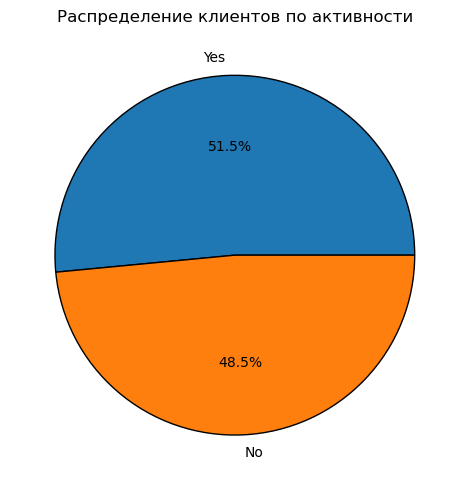

In [21]:
plt.figure(figsize=[7,5])
IsActiveMember = dict(df["IsActiveMember"].value_counts())
plt.pie(IsActiveMember.values(),labels=IsActiveMember.keys(),wedgeprops={"edgecolor":"black"},autopct="%1.1f%%")
plt.title("Распределение клиентов по активности")
plt.tight_layout()
plt.show()

In [22]:
pd.pivot_table(df,
               index=['IsActiveMember','Exited'],
              values=['Surname'],
              aggfunc=[len])

len
                      Surname
IsActiveMember Exited        
No             No        3547
               Yes       1302
Yes            No        4416
               Yes        735

Лишь около половины клиентов банка являются активными клиентами. Можно заметить, что среди неактивных клиентов отток почти вдвое больше, потому активность влияет на целевую переменную.

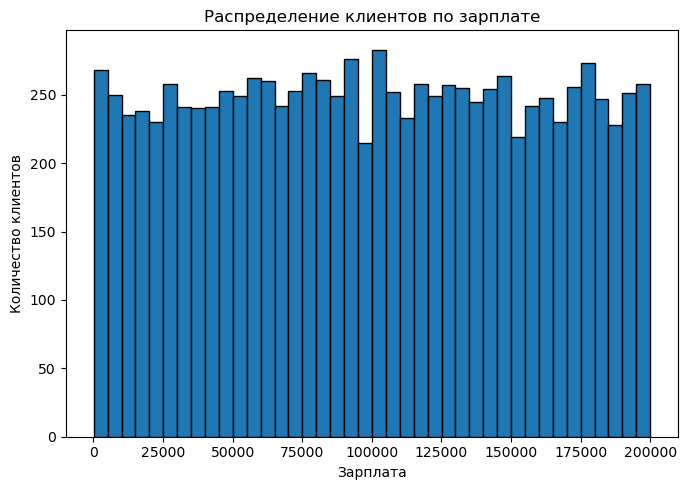

In [23]:
plt.figure(figsize=[7,5])
plt.hist(df.EstimatedSalary,bins=40,edgecolor = 'black')
plt.xlabel("Зарплата")
plt.ylabel("Количество клиентов")
plt.title("Распределение клиентов по зарплате")
plt.tight_layout()
plt.show()

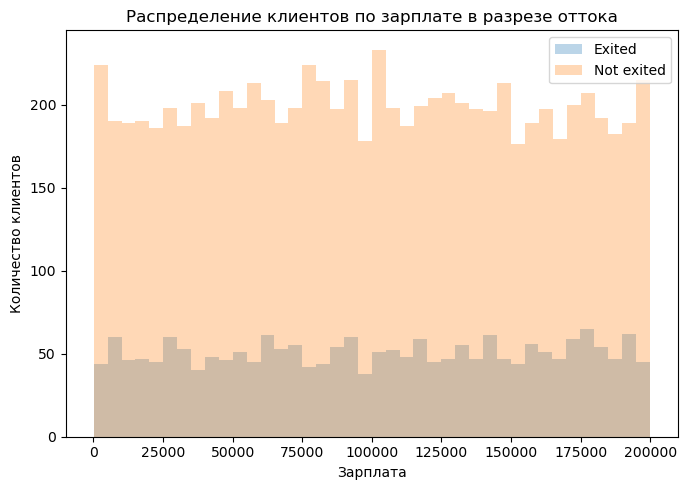

In [24]:
plt.figure(figsize=[7,5])
plt.hist(df[df["Exited"]=="Yes"]["EstimatedSalary"],bins=40,alpha=0.3, label="Exited")
plt.hist(df[df["Exited"]=="No"]["EstimatedSalary"],bins=40,alpha=0.3,label="Not exited")
plt.xlabel("Зарплата")
plt.ylabel("Количество клиентов")
plt.title("Распределение клиентов по зарплате в разрезе оттока")
plt.legend()
plt.tight_layout()
plt.show()

Распределение клиентов по зарплате практически непрерывное в интервале от 0 до 200000. Вызывает сомнение корректность нижней границы, которая должна быть связана с МРОТ. Анализ аномалий будет производиться далее. 
Явной связи уровня зарплаты и показателей оттока не наблюдается.

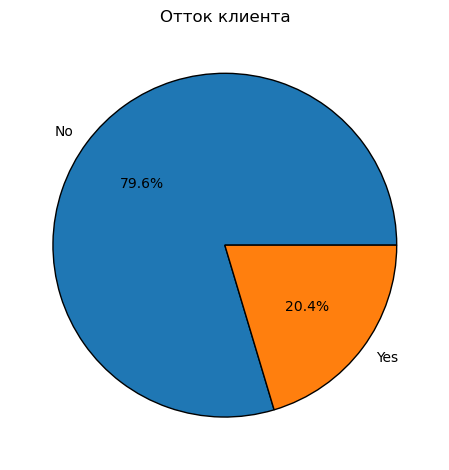

In [25]:
Exited = dict(df["Exited"].value_counts())
plt.pie(Exited.values(),labels=Exited.keys(),wedgeprops={"edgecolor":"black"},autopct="%1.1f%%")
plt.title("Отток клиента")
plt.show
plt.tight_layout()
plt.show()

В целом по датасету отток клиентов составляет 20%.

# Подготовка и преобразование типов данных

Удалим столбец с фамилией клиента, который не внесет вклад в построение модели МО.

In [26]:
df.drop(columns = ['Surname'],axis = 1,inplace=True)

Перейдем к обработке категориальных признаков. Для страны и пола клиента было решено использовать ohe-hot кодирование, чтобы избежать арифметического сопоставления однородных признаков.

In [27]:
df=pd.concat([df, pd.get_dummies(df.Geography,prefix='country')], axis=1)
df.drop(columns = ['Geography'],axis = 1,inplace=True)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,619,Female,42,2,0.00,1.0,Yes,101348.88,Yes,1,0,0
1,608,Female,41,1,83807.86,1.0,Yes,112542.58,No,0,0,1
2,502,Female,42,8,159660.80,3.0,No,113931.57,Yes,1,0,0
3,699,Female,39,1,0.00,2.0,No,93826.63,No,1,0,0
4,850,Female,43,2,125510.82,1.0,Yes,79084.10,No,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2.0,No,96270.64,No,1,0,0
9996,516,Male,35,10,57369.61,NaN,Yes,101699.77,No,1,0,0
9997,709,Female,36,7,0.00,1.0,Yes,42085.58,Yes,1,0,0
9998,772,Male,42,3,75075.31,2.0,No,92888.52,Yes,0,1,0


Так, страна клиента теперь задается вектором [1,0,0]-Франция, [0,1,0] - Германия или [0,0,1]-Испания.

In [28]:
df=pd.concat([df, pd.get_dummies(df.Gender,prefix='gender')], axis=1)
df.drop(columns = ['Gender'],axis = 1,inplace=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1.0,Yes,101348.88,Yes,1,0,0,1,0
1,608,41,1,83807.86,1.0,Yes,112542.58,No,0,0,1,1,0
2,502,42,8,159660.80,3.0,No,113931.57,Yes,1,0,0,1,0
3,699,39,1,0.00,2.0,No,93826.63,No,1,0,0,1,0
4,850,43,2,125510.82,1.0,Yes,79084.10,No,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2.0,No,96270.64,No,1,0,0,0,1
9996,516,35,10,57369.61,NaN,Yes,101699.77,No,1,0,0,0,1
9997,709,36,7,0.00,1.0,Yes,42085.58,Yes,1,0,0,1,0
9998,772,42,3,75075.31,2.0,No,92888.52,Yes,0,1,0,0,1


Аналогично для пола: [1,0]-женский, [0,1]-мужской.

Для столбцов, где важен логический порядок значений, выполним преобразование с помощью метода .map.

In [29]:
df.IsActiveMember.value_counts()

Yes    5151
No     4849
Name: IsActiveMember, dtype: int64

In [30]:
IsActiveMember_dict={
    'Yes':1,
    'No':0
}

In [31]:
df.IsActiveMember=df.IsActiveMember.map(IsActiveMember_dict)

In [32]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

Для активных клиентов значение признака 1, для пасивных-0.

In [33]:
df.Exited.value_counts()

No     7963
Yes    2037
Name: Exited, dtype: int64

In [34]:
Exited_dict={
    'Yes':1,
    'No':0
}

In [35]:
df.Exited=df.Exited.map(IsActiveMember_dict)

In [36]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Для клиентов, подверженных оттоку, значение признака 1, для постоянных-0.

Итоговый вид преобразованного датасета:

In [37]:
df.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,gender_Female,gender_Male
2277,732,43,6,0.00,2.0,0,65731.53,0,1,0,0,1,0
4543,791,42,10,113657.41,2.0,1,139946.68,1,0,1,0,1,0
9347,660,36,0,84438.57,1.0,1,181449.51,0,0,0,1,1,0
7872,639,46,10,110031.09,2.0,1,133995.59,0,0,1,0,1,0
6321,590,47,0,117879.32,1.0,1,8214.46,0,1,0,0,0,1
9530,667,41,6,0.00,2.0,0,167181.77,0,1,0,0,0,1
6628,596,57,6,0.00,2.0,1,72402.00,0,0,0,1,0,1
7253,779,55,0,133295.98,1.0,0,22832.71,1,0,0,1,1,0
3900,809,36,9,68881.59,2.0,1,109135.11,0,1,0,0,0,1
5047,471,26,8,0.00,2.0,1,179655.87,0,0,0,1,0,1


# Очистка данных

Описание связей между переменными:

In [38]:
corr_matryx=df.corr()
corr_matryx.style.background_gradient(cmap='coolwarm', axis=None)

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,gender_Female,gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012005,0.025651,-0.001473,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.031745,0.085472,-0.007309,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.014315,-0.028362,0.007504,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.302481,-0.010084,0.013062,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.012005,-0.031745,0.014315,-0.302481,1.000000,0.010612,0.013467,-0.047518,0.001658,-0.009371,0.007499,0.022733,-0.022733
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.010612,1.000000,-0.011302,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.001473,-0.007309,0.007504,0.013062,0.013467,-0.011302,1.000000,0.012146,-0.002960,0.010567,-0.007189,0.007979,-0.007979
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047518,-0.156128,0.012146,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
country_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001658,0.003317,-0.002960,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772
country_Germany,0.005538,0.046897,-0.000567,0.401110,-0.009371,-0.020486,0.010567,0.173488,-0.580359,1.000000,-0.332084,0.024628,-0.024628


Анализ корелляции переменных показывает, что сильные связи между ними практически отсутствуют (за исключением обратной линейной зависимости между женским и мужским полом). 
Так, целевую переменную в наибольшей степени определяют возраст клиента, гражданство Германии и активность. Слабо воздействуют также пол и баланс счета. Эти закономерности были выявлены ранее в ходе графического анализа.

### 1. Работа с пропусками

Дублируем статистику о датасете:

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    9922 non-null   float64
 5   IsActiveMember   10000 non-null  int64  
 6   EstimatedSalary  9989 non-null   float64
 7   Exited           10000 non-null  int64  
 8   country_France   10000 non-null  uint8  
 9   country_Germany  10000 non-null  uint8  
 10  country_Spain    10000 non-null  uint8  
 11  gender_Female    10000 non-null  uint8  
 12  gender_Male      10000 non-null  uint8  
dtypes: float64(3), int64(5), uint8(5)
memory usage: 674.0 KB


In [40]:
df.isna().sum()

CreditScore         0
Age                 0
Tenure              0
Balance             0
NumOfProducts      78
IsActiveMember      0
EstimatedSalary    11
Exited              0
country_France      0
country_Germany     0
country_Spain       0
gender_Female       0
gender_Male         0
dtype: int64

In [41]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,gender_Female,gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,9922.000000,10000.000000,9989.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530639,0.515100,100071.518871,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581888,0.499797,57512.067936,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,90.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,50974.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,100183.050000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,149384.430000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Существуют пропуски данных о зарплате и числе продуктов. Несмотря на несущественный объем пропусков, предпримем попытки по их заполнению. Пропущенные значения о зарплате:

In [42]:
df[df.NumOfProducts.isnull()]

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,gender_Female,gender_Male
89,635,28,3,81623.67,NaN,1,156791.36,0,0,1,0,1,0
93,769,29,8,0.00,NaN,1,172290.61,0,1,0,0,0,1
119,699,34,4,185173.81,NaN,0,120834.48,0,0,1,0,0,1
120,828,34,8,129433.34,NaN,0,38131.77,0,1,0,0,0,1
161,684,30,2,0.00,NaN,0,83473.82,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,678,41,2,148088.11,NaN,0,14083.12,0,1,0,0,0,1
9972,758,26,4,155739.76,NaN,0,171552.02,0,1,0,0,0,1
9979,677,58,1,90022.85,NaN,1,2988.28,0,1,0,0,1,0
9989,841,28,4,0.00,NaN,1,179436.60,0,0,0,1,0,1


Так, согласно матрице корреляции, существует некоторая связь между балансом счетов и их количеством. Проверим эту гипотезу, построив сводную таблицу.

In [43]:
pd.pivot_table(df,
               index=['NumOfProducts'],
              values=['Balance'],
              aggfunc=[np.mean,min,max,sum])

,mean,min,max,sum
,Balance,Balance,Balance,Balance
NumOfProducts,,,,
1.0,98475.941248,0.0,238387.56,4.964172e+08
2.0,51952.622236,0.0,214346.96,2.367481e+08
3.0,76029.982197,0.0,250898.09,2.007192e+07
4.0,93733.135000,0.0,195238.29,5.623988e+06


Исходя из полученных данных, заполнить пропуски числа продуктов на основании баланса быстро не получится. Нулевые и максимальные значения баланса присутствуют практически в каждой группе по продуктам, баланс возрастает нелинейно. Потому было принято решение сделать заполнение по среднему.

In [44]:
df.NumOfProducts.fillna(round(df.NumOfProducts.mean()),inplace=True)

In [45]:
df.isna().sum()

CreditScore         0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
IsActiveMember      0
EstimatedSalary    11
Exited              0
country_France      0
country_Germany     0
country_Spain       0
gender_Female       0
gender_Male         0
dtype: int64

Рассмотрим пропуски значений по зарплате.

In [46]:
df[df.EstimatedSalary.isnull()]

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,gender_Female,gender_Male
21,636,32,8,0.00,2.0,0,NaN,0,0,0,1,1,0
72,657,37,0,163607.18,1.0,1,NaN,0,0,0,1,1,0
104,670,65,1,0.00,1.0,1,NaN,1,0,0,1,1,0
146,635,29,8,138296.94,2.0,0,NaN,0,0,0,1,1,0
213,676,34,1,63095.01,1.0,1,NaN,0,1,0,0,1,0
535,608,59,1,0.00,1.0,0,NaN,1,1,0,0,0,1
681,591,58,5,128468.69,1.0,1,NaN,0,0,0,1,0,1
817,580,42,2,123331.36,1.0,0,NaN,1,0,1,0,1,0
4289,731,37,1,128932.40,1.0,1,NaN,0,0,0,1,1,0
7583,682,26,8,0.00,2.0,0,NaN,0,1,0,0,0,1


Пропущенных значений мало и, как показал статистический и графический анализ ряда, размах вариации 200 тыс. при среднем 100 тыс. и СКО 57 тыс. Потому высока вероятнисть некорректного заполнения при использовании метода среднего. Другие признаки, согласно матрице корреляции, также не оказывают влияние на размер зарплаты. Учитывая число пропусков, их целесообразно удалить.

In [47]:
df.dropna(inplace=True)

In [48]:
df.isna().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
Exited             0
country_France     0
country_Germany    0
country_Spain      0
gender_Female      0
gender_Male        0
dtype: int64

По результатам работы с пропусками получен датасет, состоящий из 9989 строк со следующими характеристиками:

In [49]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,gender_Female,gender_Male
count,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000
mean,650.531885,38.919111,5.014216,76483.063351,1.534488,0.515167,100071.518871,0.203624,0.501552,0.251076,0.247372,0.454100,0.545900
std,96.696471,10.484941,2.891579,62395.758435,0.581156,0.499795,57512.067936,0.402713,0.500023,0.433654,0.431506,0.497914,0.497914
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,90.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,50974.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97188.620000,1.000000,1.000000,100183.050000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127638.350000,2.000000,1.000000,149384.430000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2. Работа с выбросами

In [50]:
df.nunique()

CreditScore         460
Age                  70
Tenure               11
Balance            6375
NumOfProducts         4
IsActiveMember        2
EstimatedSalary    9988
Exited                2
country_France        2
country_Germany       2
country_Spain         2
gender_Female         2
gender_Male           2
dtype: int64

С учетом специфики датасета выделяются две наиболее вариативных переменных-баланс и зарплата, особенности распределения которых были выделены при графическом анализе. Построим боксплот для их значений.

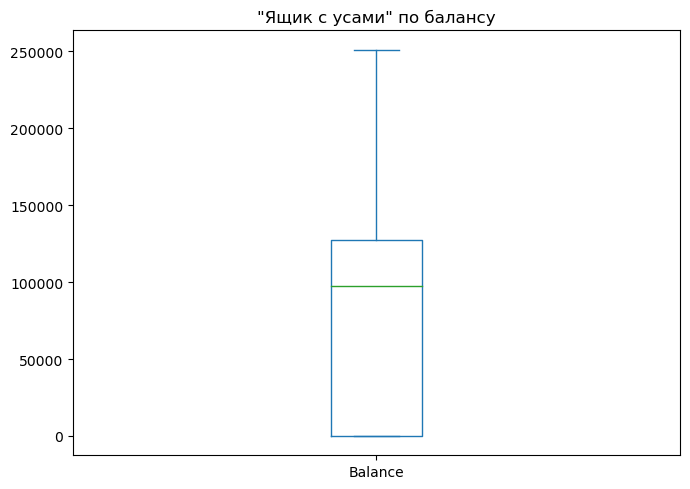

In [51]:
plt.figure(figsize=[7,5])
df.Balance.plot.box(return_type='both')
plt.title('"Ящик с усами" по балансу')
plt.tight_layout()
plt.show()

Аномальных значений не обнаружено. Наличие более чем четверти нулевых значений может иметь экономический смысл, потому их удаление не требуется.

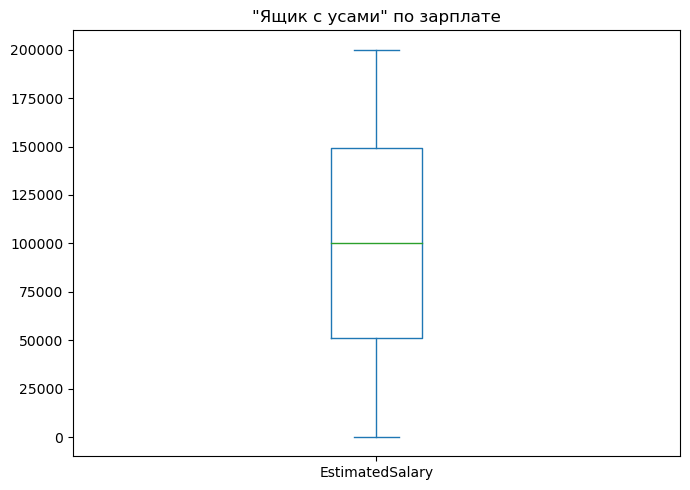

In [52]:
plt.figure(figsize=[7,5])
df.EstimatedSalary.plot.box(return_type='both')
plt.title('"Ящик с усами" по зарплате')
plt.tight_layout()
plt.show()

Резких перепадов значений зарплаты не наблюдается, что было отражено на гистограмме и подтверждается боксплотом. Однако вызывает сомнение нижняя граница значений-зарплата колеблется от 90 до 200000. у.е. Конечно, в выборке также могут быть студенты, домохозяйки и безработные с нулевым доходом. Но даже при этом среднегодовой доход в странах Европы, откуда клиенты банка, около 25000 евро. Однако в таком случае пришлось бы удалить половину квартиля значений, что видно на графике.
С аномальными значениями зарплаты принято решение пока ничего не предпринимать, их удаление будет производиться по мере необходимости в процессе корректировки точности модели. Однако, учитывая низкую корелляцию оттока и зарплаты, данный фактор не должен оказать существенного влияния.

# Масштабирование данных

Среди методов масштабирования данных было принято решение выбрать нормализацию, так как она позволяет сохранить форму распределения и в некоторой степени-экономическую составляющую переменных.

In [53]:
columns_to_scale = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]
scaler = MinMaxScaler()
for column in columns_to_scale:
    df[column] = scaler.fit_transform(df[[column]])

In [54]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,0.506541,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,1,0.562537,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,0,0.569485,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0.468912,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,0.395163,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,0,0.481138,0,1,0,0,0,1
9996,0.332,0.229730,1.0,0.228657,0.333333,1,0.508297,0,1,0,0,0,1
9997,0.718,0.243243,0.7,0.000000,0.000000,1,0.210080,1,1,0,0,1,0
9998,0.844,0.324324,0.3,0.299226,0.333333,0,0.464219,1,0,1,0,0,1


In [55]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,gender_Female,gender_Male
count,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000
mean,0.601064,0.282691,0.501422,0.304837,0.178163,0.515167,0.500151,0.203624,0.501552,0.251076,0.247372,0.454100,0.545900
std,0.193393,0.141688,0.289158,0.248690,0.193719,0.499795,0.287701,0.402713,0.500023,0.433654,0.431506,0.497914,0.497914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.189189,0.300000,0.000000,0.000000,0.000000,0.254547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.604000,0.256757,0.500000,0.387363,0.000000,1.000000,0.500709,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.736000,0.351351,0.700000,0.508726,0.333333,1.000000,0.746836,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Итоговые данные для модели

Значения признаков:

In [56]:
x = df.drop("Exited",axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,0.506541,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,1,0.562537,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,0,0.569485,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0.468912,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,0.395163,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,0,0.481138,1,0,0,0,1
9996,0.332,0.229730,1.0,0.228657,0.333333,1,0.508297,1,0,0,0,1
9997,0.718,0.243243,0.7,0.000000,0.000000,1,0.210080,1,0,0,1,0
9998,0.844,0.324324,0.3,0.299226,0.333333,0,0.464219,0,1,0,0,1


Целевая переменная:

In [57]:
y = df["Exited"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9989, dtype: int64

# Выводы

В ходе выполнения контрольной работы были изучены, обработаны и подготовлены для модели машинного обучения данные об оттоке клиентов банка.

По результатам анализа были выявлены следующие закономерности:

-При высоком кредитном рейтинге клиенты меньше покидают банк, но влияние этого признака на отток не существенное.

-Клиенты из Германии больше подвержены оттоку.

-Женщины чаще покидают банк.

-Подверженные оттоку клиенты, как правило, в возрасте от 40 до 50 лет.

-Срок владения продуктами не оказывает существенного влияния на вероятность ухода клиента.

-При нулевом балансе счета шанс оттока ниже, чем в остальных случаях.

-Наименьший шанс оттока у клиентов с двумя продуками банка. С увеличением продуктов увеличивается отток, он существеннен и для держателей 1 продукта.

-Шанс потери активного клиента меньше, чем неактивного.

-С ростом зарплаты отток показывает небольшое увеличение, в целом связь оттока и зарплаты небольшая.

Эти факторы будут учтены в ходе дальнейшей работы с данными.